In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



In [3]:
!kaggle datasets download -d farzadnekouei/trash-type-image-dataset
!unzip trash-type-image-dataset.zip -d trash_dataset


Dataset URL: https://www.kaggle.com/datasets/farzadnekouei/trash-type-image-dataset
License(s): unknown
  0% 0.00/40.9M [00:00<?, ?B/s]
100% 40.9M/40.9M [00:00<00:00, 738MB/s]
Archive:  trash-type-image-dataset.zip
  inflating: trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_001.jpg  
  inflating: trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_002.jpg  
  inflating: trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_003.jpg  
  inflating: trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_004.jpg  
  inflating: trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_005.jpg  
  inflating: trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_006.jpg  
  inflating: trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_007.jpg  
  inflating: trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_008.jpg  
  inflating: trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_009.jpg  
  inflating: trash_dataset/TrashType_Image_Dataset/cardb

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

sample_folder = '/content/trash_dataset/dataset/training/plastic'  # You can change "plastic" to "paper", "glass", etc.

images = glob.glob(sample_folder + '/*.jpg')

plt.figure(figsize=(12, 6))
for i in range(5):
    img = mpimg.imread(images[i])
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.show()


IndexError: list index out of range

<Figure size 1200x600 with 0 Axes>

Found 403 images in folder.


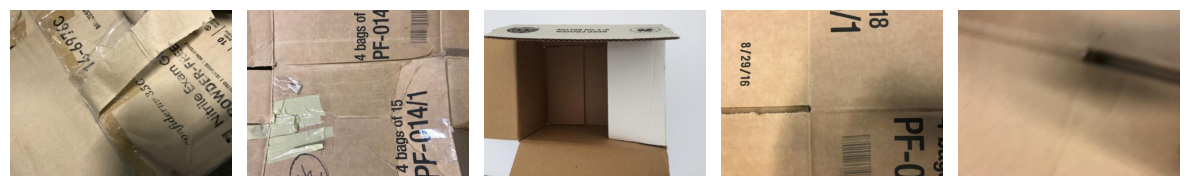

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import os

# Set correct path to any class folder (e.g., cardboard, glass, metal, etc.)
folder_path = '/content/trash_dataset/TrashType_Image_Dataset/cardboard'

# Support all image extensions
image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.JPG', '*.JPEG', '*.PNG']
images = []
for ext in image_extensions:
    images.extend(glob.glob(os.path.join(folder_path, ext)))

print(f"Found {len(images)} images in folder.")

# Show up to 5 images
plt.figure(figsize=(12, 6))
for i in range(min(5, len(images))):
    img = mpimg.imread(images[i])
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.show()


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224
BATCH_SIZE = 32

data_path = '/content/trash_dataset/TrashType_Image_Dataset'

# Split 80% for training, 20% for validation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    data_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [7]:
from tensorflow.keras.applications import EfficientNetV2B2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load base EfficientNetV2B2 without top layer
base_model = EfficientNetV2B2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze the base model (do not train its layers)
base_model.trainable = False

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(6, activation='softmax')(x)

# Build the final model
model = Model(inputs=base_model.input, outputs=output)


35839040/35839040 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [9]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=2
)


Epoch 1/2


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 241s 3s/step - accuracy: 0.1592 - loss: 1.8112 - val_accuracy: 0.2346 - val_loss: 1.7288
Epoch 2/2
64/64 ━━━━━━━━━━━━━━━━━━━━ 213s 3s/step - accuracy: 0.1862 - loss: 1.7520 - val_accuracy: 0.2346 - val_loss: 1.7226
